## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.




In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import networkx as nx 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Question 1: Propensity score matching¶

First, load the data:

In [111]:
la = pd.read_csv('lalonde.csv')
la.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


## 1.1 A naive analysis

In [112]:
def nice_hist(attribute):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    
    ay = plt.subplot(1, 3, 1)
    ay.set_title(attribute + " for Treated Group")
    plt.hist(la[la['treat']==1][attribute], color = 'steelblue')
                 
    ay = plt.subplot(1, 3, 2)
    ay.set_title(attribute + " for Control Group")
    plt.hist(la[la['treat']==0][attribute],color = 'palevioletred')
                 
    ay = plt.subplot(1, 3, 3)
    ay.set_title(attribute)
    plt.hist(la[la['treat']==1][attribute],label = 'Treated', color = 'steelblue',alpha = 0.5)
    ay.legend('Treated', loc = 'best')
    plt.hist(la[la['treat']==0][attribute],label = 'Control', color = 'palevioletred',alpha = 0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

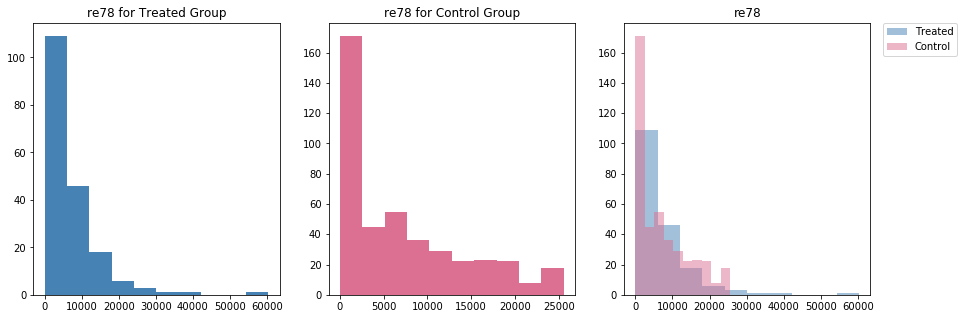

In [113]:
nice_hist('re78')

In [114]:
temp_sum = pd.DataFrame()
temp_sum['re78 for Treated'] = la[la['treat']==1]['re78'].describe()
temp_sum['re78 for Control'] = la[la['treat']==0]['re78'].describe()
temp_sum

,re78 for Treated,re78 for Control
count,185.000000,429.000000
mean,6349.143530,6984.169742
std,7867.402218,7294.161791
min,0.000000,0.000000
25%,485.229800,220.181300
50%,4232.309000,4975.505000
75%,9642.999000,11688.820000
max,60307.930000,25564.670000


#### Distribution Plots
Taking a look at first, the plots, one can notice that both groups follow a similar distribution in terms of shape. We can also notice that the control group, as in the people who have not been subject to the training or *treated*, have a shorter tail than the *treated* group. This means that, we have a larger concentration of people having low to average earnings (*5000 - 25000*). 
On the other hand, for the case of the *treated* group, we can see that the tail is larger, implying that there are more people earning relatively high earnings(*>30000*). Additionally, it can be seen that the number of control subjects is higher than that of the treated ones. We can confirm that by checking the statistical summary of our feature.

#### Distribution Descriptions
We then shift our attention to the statistical description of both groups. Firstly, it is indeed true that we have twice as much control subjects as we have treated ones (429 control vs 185 treated). A naiive researcher (which we're not), would directly look at the means of the two groups and deduce that the training or the treatment is actually bad as it decreased the mean earnings of the workers that underwent it. However, one should ask: are the following control and treated groups *good* to measure the effect of the *treatment process*. By *good*, which will be seen later, we mean by homogeneous and balanced.


-------------------------------------------------

## 1.2 A closer look at the data

In [115]:
# add the white column
la['white'] = [1- la['black'][i] -  la['hispan'][i] for i in range(len(la))]

So, to dig in deeper to know the true identities of our treated and control groups, we will plot the distribution of each feature for the treated group and for the control group. We can't rule out the idea that the data distributions have substantial discrepancies between the control and treated groups. 

### Age

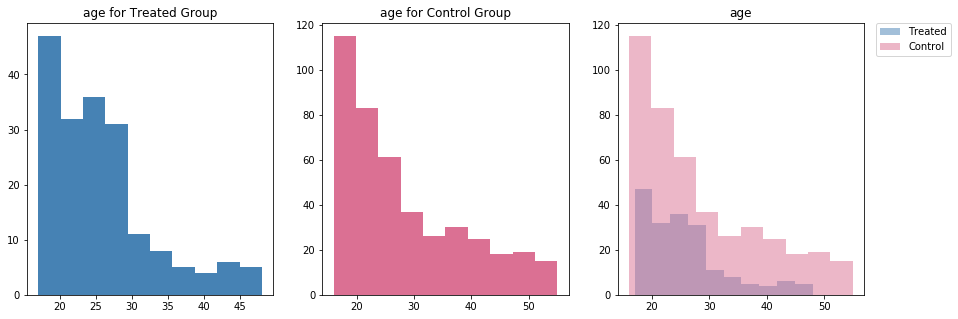

In [116]:
nice_hist('age')

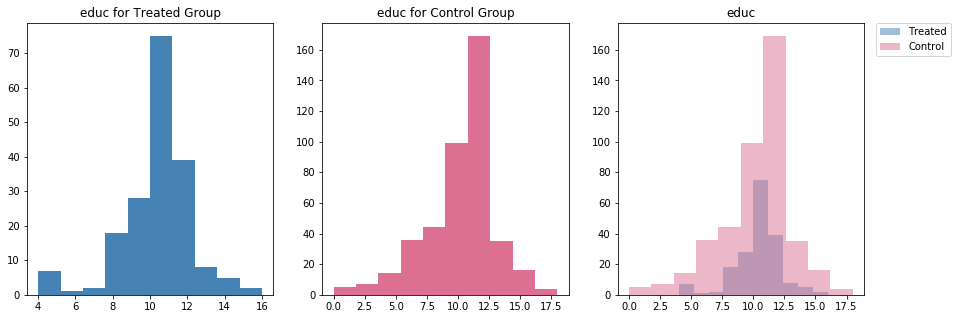

In [117]:
nice_hist('educ')

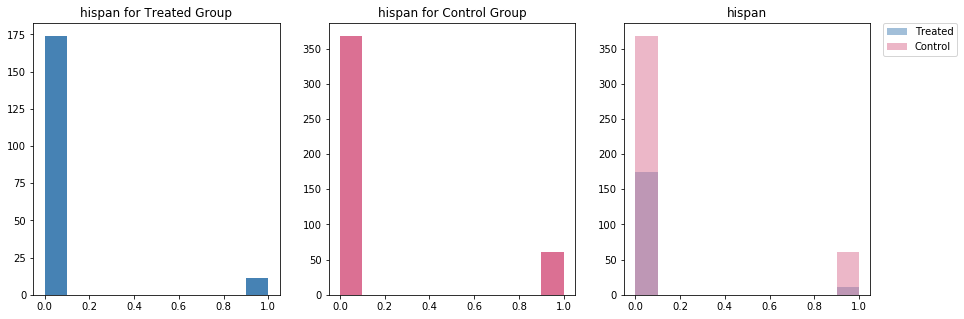

In [118]:
nice_hist('hispan')

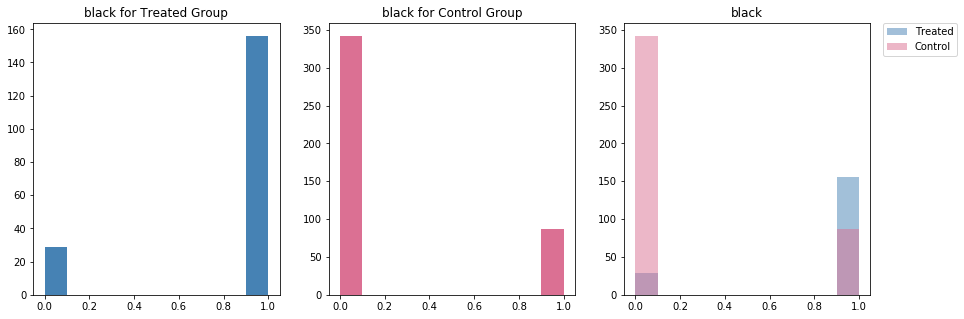

In [119]:
nice_hist('black')

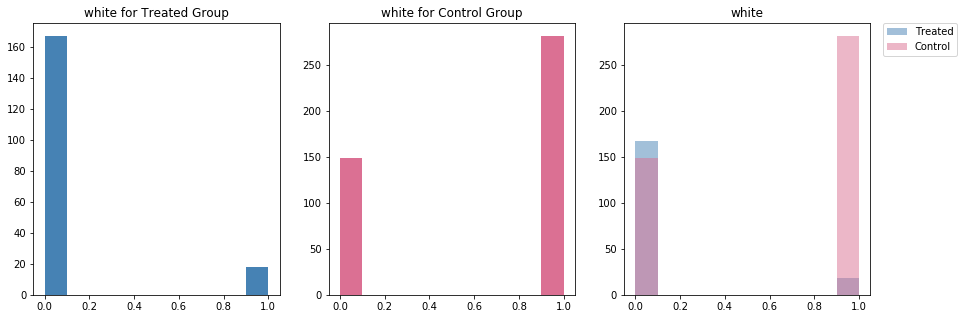

In [120]:
nice_hist('white')

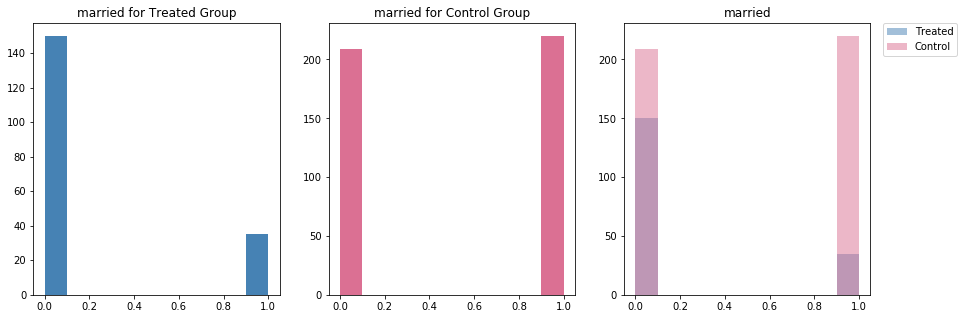

In [121]:
nice_hist('married')

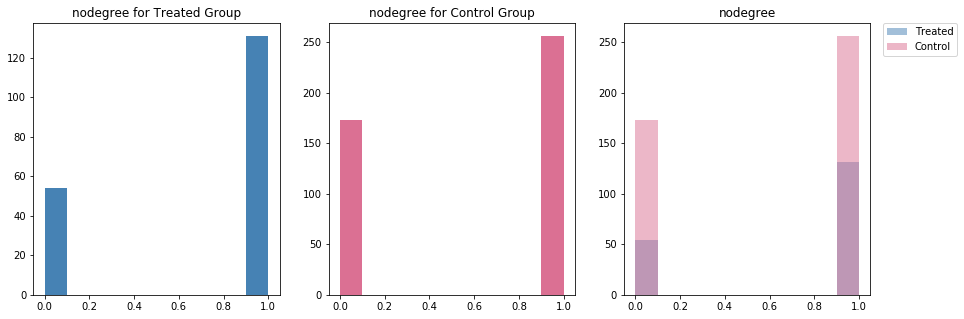

In [122]:
nice_hist('nodegree')

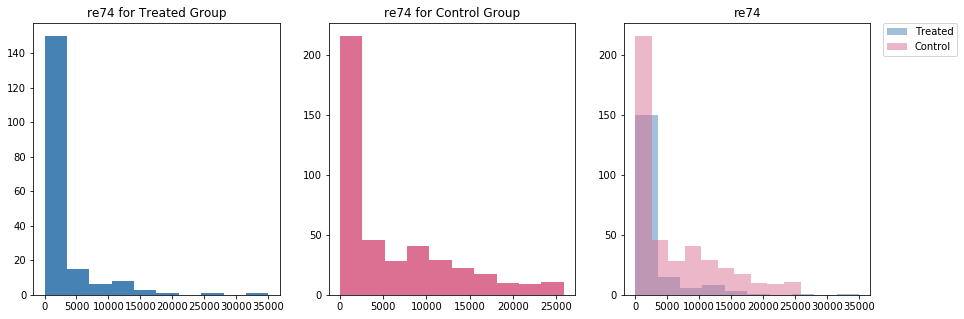

In [123]:
nice_hist('re74')

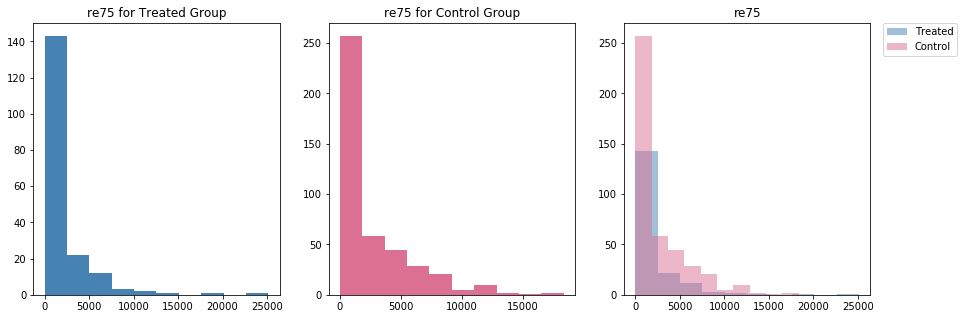

In [124]:
nice_hist('re75')

In [125]:
index_array = la[la['treat']==1]['re78'].describe().index
sum_df = pd.DataFrame(index = index_array)
attributes = ['age','age','educ','educ','black','black','hispan','hispan','white','white', 'married', 'married'
              ,'nodegree','nodegree','re74','re74','re75','re75']

columns = [('age','Treated Group'),('age','Control Group'),('educ','Treated Group'),('educ','Control Group')
           ,('black','Treated Group'),('black','Control Group'),('hispan','Treated Group'),('hispan','Control Group'),
           ('white','Treated Group'),('white','Control Group')
           ,('married','Treated Group'),('married','Control Group'),('nodegree','Treated Group'),('nodegree','Control Group')
          ,('re74','Treated Group'),('re74','Control Group'),('re75','Treated Group'),('re75','Control Group')]

stat_df  = pd.DataFrame(index = index_array, columns = columns)
stat_df.columns=pd.MultiIndex.from_tuples(columns)
i = 0
for col, att in zip(columns, attributes):
    if i%2==0:
        stat_df[col] = np.array(la[la['treat']==1][att].describe())
    else: 
        stat_df[col] = np.array(la[la['treat']==0][att].describe())
    i+=1
        
stat_df

age                        educ                       black  \
      Treated Group Control Group Treated Group Control Group Treated Group   
count    185.000000    429.000000    185.000000    429.000000    185.000000   
mean      25.816216     28.030303     10.345946     10.235431      0.843243   
std        7.155019     10.786653      2.010650      2.855238      0.364558   
min       17.000000     16.000000      4.000000      0.000000      0.000000   
25%       20.000000     19.000000      9.000000      9.000000      1.000000   
50%       25.000000     25.000000     11.000000     11.000000      1.000000   
75%       29.000000     35.000000     12.000000     12.000000      1.000000   
max       48.000000     55.000000     16.000000     18.000000      1.000000   

                           hispan                       white                \
      Control Group Treated Group Control Group Treated Group Control Group   
count    429.000000    185.000000    429.000000    185.000000    429.000000   
mean       0.202797      0.059459      0.142191      0.097297      0.655012   
std        0.402552      0.237124      0.349654      0.297166      0.475919   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            married                    nodegree                        re74  \
      Treated Group Control Group Treated Group Control Group Treated Group   
count    185.000000    429.000000    185.000000    429.000000    185.000000   
mean       0.189189      0.512821      0.708108      0.596737   2095.573689   
std        0.392722      0.500419      0.455867      0.491126   4886.620353   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      1.000000      1.000000      0.000000   
75%        0.000000      1.000000      1.000000      1.000000   1291.468000   
max        1.000000      1.000000      1.000000      1.000000  35040.070000   

                             re75                
      Control Group Treated Group Control Group  
count    429.000000    185.000000    429.000000  
mean    5619.236506   1532.055314   2466.484443  
std     6788.750796   3219.250870   3291.996183  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%     2547.047000      0.000000   1086.726000  
75%     9277.128000   1817.284000   3881.419000  
max    25862.320000  25142.240000  18347.230000

As we take a deeper look into the data and analyze the graphs of the different attribute between the *Controlled* subjects and the *Treated* ones, we notice the substantial discrepancies that exist between the two groups.
In the overlapping graphs, we are not quite interested in the vertical difference of the distributions, but rather the actual distributions themselves. The vertical distance is always going to exist for this case as we have much more control subjects than treated ones. What we're truly interested in are how the *average value* for the different features differs between the two groups.

Nevertheless, substantial differences exits between the two group, especially in:

- Age: the control subjects are around 3 years older than the treated subjects, on average. 
 <br><br>
- Education: similar.
 <br><br>
- Race: HUGE differences whereby we can see that the treated subjects are mostly black people with little few hispanics and white people. The opposite is true for the control subjects.
 <br><br>
- Marital Status: Also, we notice very large differences in terms of marital status whereby only about 20% of the treated population are married while that of the control groups is greated than half.
 <br><br>
- Earnings in 1974: Again, treated subjects have much less earnings in 1974, to the extent where it's almost equivalent to a third of what the control subjects have earned in the same year. 
 <br><br>
- Earnings in 1975: Similar to 1974 but less acute.
 <br><br>
 
What can be concluded from the above analysis is that no rigid or robust conclusions or interpretations can be drawn on how good or bad the *treatment* is or isn't. This is due to the fact that the two different groups are extremeley unbalanced and can't be treated as the same population, nor generalized. In fact, the data, **in its given** form, is practically useless and any conclusion made upon the basis of it is obsolete. Unless, of course, we find a way to rule out the na¨ıvete.

-------------------------------------------------------------------

# 1.3 A propensity score model

#### ***To believe that something is true because it would be convenient if it were true is a fair definition of na¨ıvete.***

We will use the **linear_model.LogisticRegression()**. Usually, this model is used for the purpose of labelling/classifying datapoints. However, we are not quite interested in the latter as much as we are interested in using the model to create an indentifier or a scalar representative of a datapoint's *characteristics or personality*. 

This identifier is the **propensity score** which measures a datapoint's likelihood of being classified or labeled as *treated*. What we mean is the following: after building the model, if there are two people who have an equal propensity score, one might say that these two people or datapoints have similar characteristics, on average. That's exactly what we will do! As we have less treated data points, we will match each treated data point to exactly one control data point with the closest absolute difference in propensity scores, on average. By that, we will be sampling out 185 control data points from the total 429, in way that maximizes the homegeneity between the two groups. 

After creating the logisitic model, we use the function *predict_proba* to get the propensity scores.

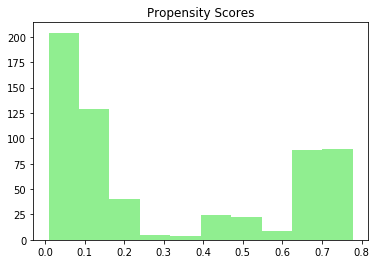

In [126]:
logistic = linear_model.LogisticRegression()

la_target = la.iloc[:,1]
la_feats = la.iloc[:,2:10]


logistic.fit(la_feats,la_target)
y_prob = logistic.predict_proba(la_feats)

# y_prob contains the complementary probabilities of each data point, one representing its probability of belong in the control,
# and the other its probability of belonging in the treated. We are interested in the latter.
# y_prob[:,1] is the probability of belonging to the group treated
plt.hist(y_prob[:,1], color = 'lightgreen')
plt.title("Propensity Scores")
plt.show()

So, we have 185 treated data points, and we aim to match each of those with one control data point based on closeness in propensity scores. By that, we will be ensuring that the control group and the treated group that we create will be much more homogeneous than the one we already have.

Additionally, we can see that the datapoints in the dataframe are sorted out already with the first 185 datapoints beieng the treated ones. We will first create a graph connecting each treated datapoint with all the control datapoints with the weight of the edges being the 1/absolute difference of the propensity scores. 

-------------------------------------------------------------

## 1.4 Balancing the dataset via matching

In [127]:
# create empty graph
T = nx.empty_graph()
c_map = []

# add all the treated nodes and label them with the color blue
for i in range(185):
    c_map.append('steelblue')
    T.add_node(i)

# add all the control nodes and label them with the color pink,
for j in range(185,614):
    c_map.append('palevioletred')
    T.add_node(j)

Network: 

    - Nodes from 0 --> 184 are the treated ones.
    - Nodes from 185 --> 613 are the control ones.

We visualize the graph just to make sure the network was properly created:

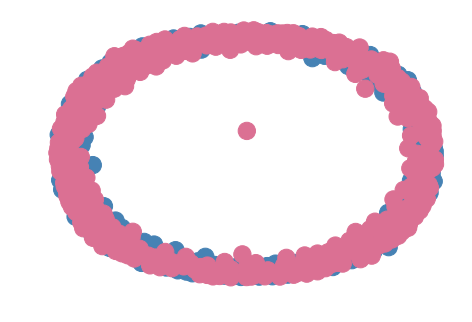

In [11]:
nx.draw(T, node_color = c_map)

Now, we fully connect the treated to the untreated nodes and ensure that no two nodes of the same group are connected together. Additionally, the weight of each edge connecting two nodes is the **reciprocal of the absolute difference of the propensity scores**. This means that two nodes with propensity scores that are very close will have an edge with an extremely high weight between them. We could've used the the Gaussian kernel, defined as
$$\mathbf{W}(u,v) = \exp \left( \frac{-d^2(u, v)}{\sigma^2} \right),$$ But, since our case is relatively simple, we can use the reciprocal.

It is good to note that there exists some nodes with exactly the same propensity score, something that will result in an edge weight of ∞. To avoid that, I calculated the maximum non-inifite weight between the edges which turned out to be something around 1 million and set the the infinite weight to something bigger.

In [128]:
for i in range(185):
    for j in range(185,614):
        if(abs(y_prob[i,1]-y_prob[j,1]) == 0):  # to avoid having the value infinity as a weight
            w = 20000000                        # after checking, 2000000 is higher than all possible values.
        else:
            w = 1/abs(y_prob[i,1]-y_prob[j,1]) 
        T.add_edge(i,j,weight = w)

We then used the *networkx* built-in function *max_weight_matching*, which returns a dictionary of the pairs of nodes with the highest weighted edges. In other words, it returns the subsample from the control population that has the closest characteristics (propensity score) on average, to the treated population. Yey!

In [129]:
T_pairs = nx.max_weight_matching(T)

We then store the *treated and control* indices separately:

In [130]:
control_indices=[]
treated_indices = list(range(0, 185))
for t in treated_indices:
    control_indices.append(T_pairs[t])

In [131]:
def nice_hist_balanced(attribute, treated = True):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    
    ay = plt.subplot(1, 3, 1)
    ay.set_title(attribute + " for Balanced Treated Group")
    plt.hist(treated_la[attribute], color = 'steelblue')
                 
    ay = plt.subplot(1, 3, 2)
    ay.set_title(attribute + " for Balanced Control Group")
    plt.hist(control_la[attribute], color = 'palevioletred')
                 
    ay = plt.subplot(1, 3, 3)
    ay.set_title(attribute +" for Balanced Groups")
    plt.hist(treated_la[attribute], label = 'Treated', color = 'steelblue',alpha = 0.5)
    plt.hist(control_la[attribute], label = 'Control', color = 'palevioletred',alpha = 0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [132]:
treated_la = la.iloc[treated_indices,:]
treated_la.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0


In [133]:
control_la = la.iloc[control_indices,:]
control_la.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
552,PSID368,0,40,11,1,0,1,1,0.0000,0.000,0.000,0
579,PSID395,0,53,12,0,0,0,0,0.0000,0.000,0.000,1
536,PSID352,0,24,12,1,0,0,0,566.2281,0.000,2284.565,0
363,PSID179,0,18,11,1,0,0,1,2068.9860,1623.823,20243.380,0
539,PSID355,0,19,9,1,0,0,1,384.0163,0.000,0.000,0


After balancing our two groups, we are interested in taking a look at how the average features of both groups came closer to one another. For that, we plot, again, the distribution of each attribute for each of the control group and the treated group, and compare:

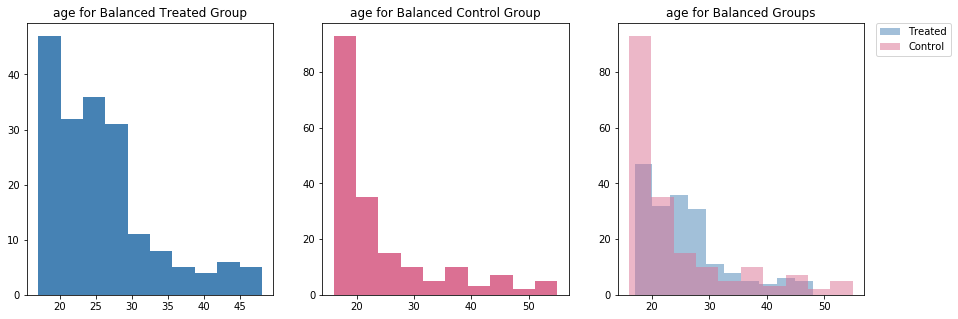

In [134]:
nice_hist_balanced('age')

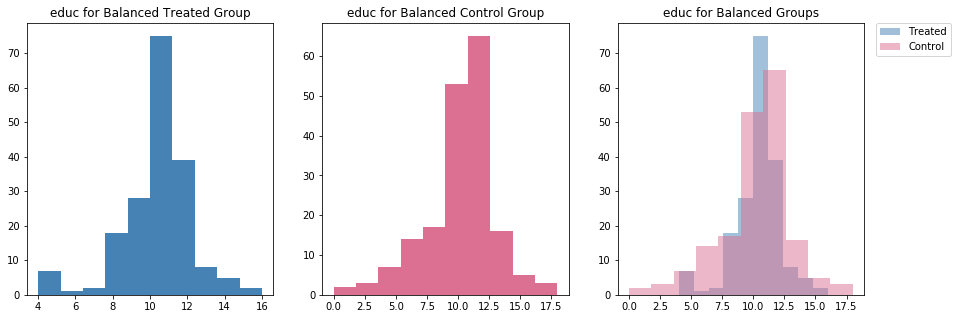

In [135]:
nice_hist_balanced('educ')

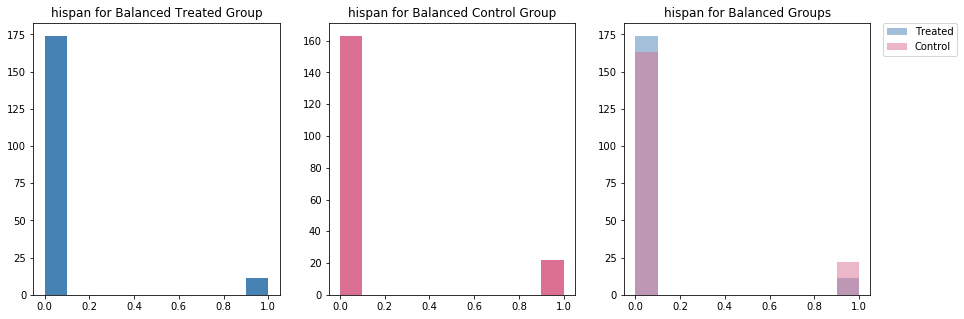

In [138]:
nice_hist_balanced('hispan')

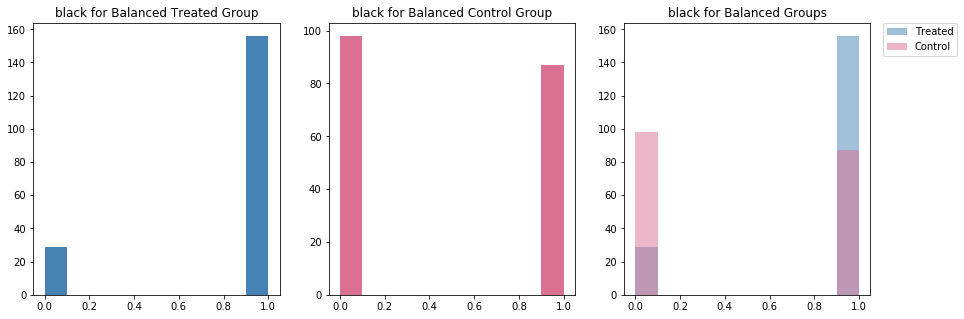

In [139]:
nice_hist_balanced('black')

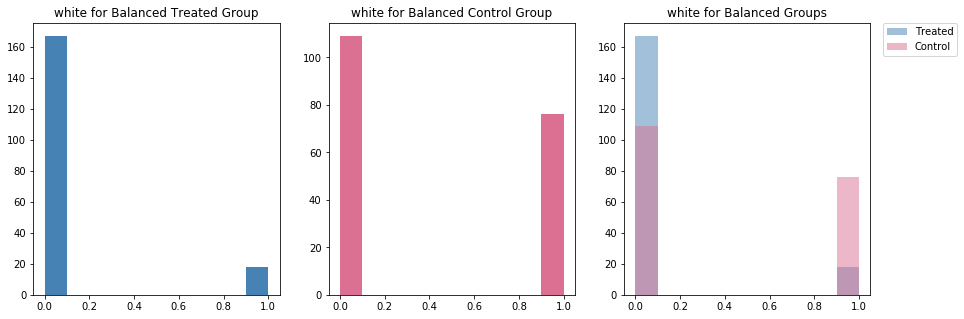

In [140]:
nice_hist_balanced('white')

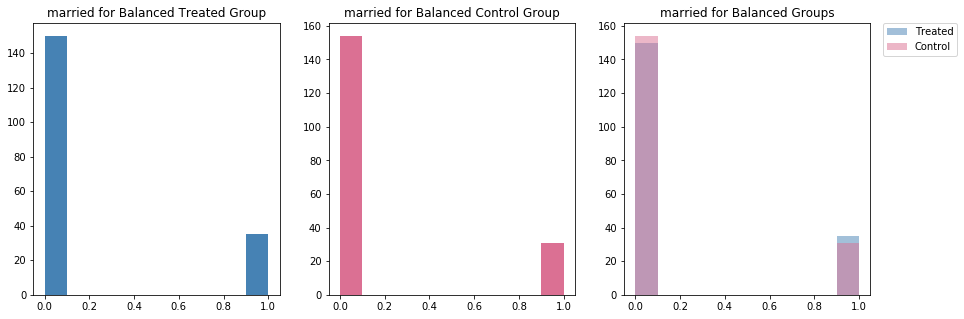

In [141]:
nice_hist_balanced('married')

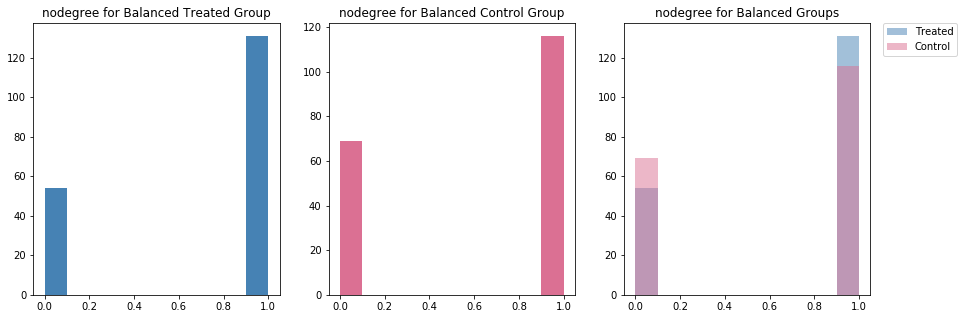

In [142]:
nice_hist_balanced('nodegree')

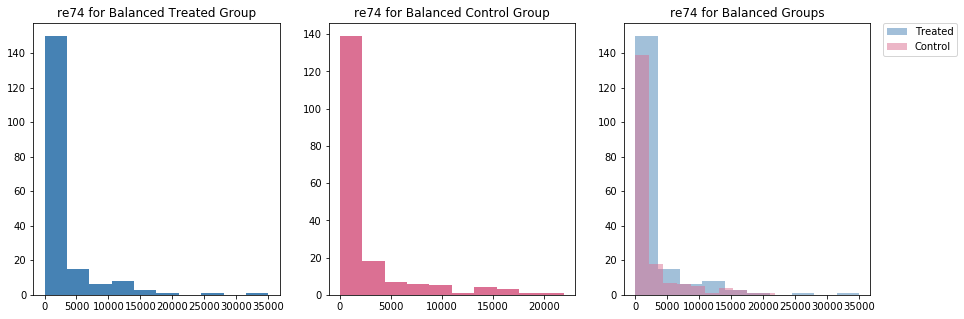

In [143]:
nice_hist_balanced('re74')

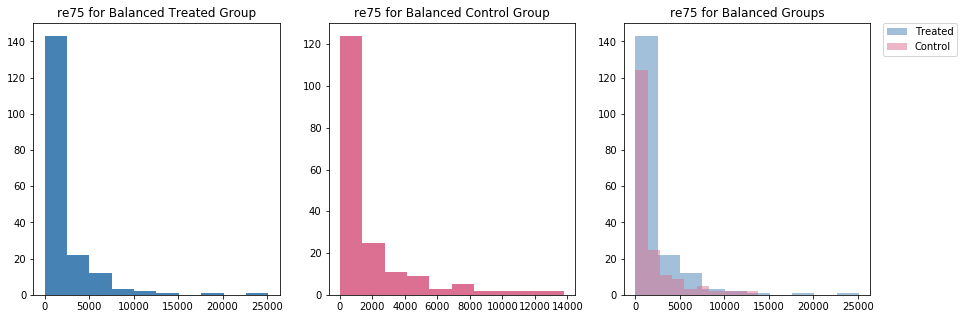

In [144]:
nice_hist_balanced('re75')

In [145]:
des_treated = treated_la.describe()
des_treated

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530,0.097297
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218,0.297166
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800,0.000000
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000,0.000000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000,0.000000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000,1.000000


In [146]:
des_control = control_la.describe()
des_control

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
count,185.0,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.0,23.713514,10.162162,0.47027,0.118919,0.167568,0.627027,2095.885961,1615.306428,5312.474907,0.410811
std,0.0,9.644726,2.861984,0.50047,0.324571,0.374495,0.484907,4029.201886,2674.747685,5842.884861,0.493316
min,0.0,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,17.000000,9.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,19.000000,10.000000,0.00000,0.000000,0.000000,1.000000,289.971500,451.161300,3392.860000,0.000000
75%,0.0,26.000000,12.000000,1.00000,0.000000,0.000000,1.000000,2068.986000,1890.581000,7933.914000,1.000000
max,0.0,55.000000,18.000000,1.00000,1.000000,1.000000,1.000000,21918.320000,13776.530000,20243.380000,1.000000


In [147]:
normalized_diff_df_1 = pd.DataFrame(index = des_control.columns)
diff  = 100*(des_control.iloc[1].values-des_treated.iloc[1].values)/((des_control.iloc[1].values+des_treated.iloc[1].values)/2)
normalized_diff_df_1['Diff %'] = diff
normalized_diff_df_1

,Diff %
treat,-200.000000
age,-8.490669
educ,-1.792304
black,-56.790123
hispan,66.666667
married,-12.121212
nodegree,-12.145749
re74,0.014900
re75,5.290216
re78,-17.779155


Firstly, we can notice how the vertical distance in the distribution plots has diminished substantitally. This is normal as we now have as much control data points as have treated ones. 

Additionally, taking a look at the description of our *new* treated and control groups, we can see how the features have become much more similar and homogeneous. In short, what has been done is that we chose a matching control group for our treated group, in a way that mimicks a random *treating process* as close as possible. We see remarkable improvements in terms of similarity in: age, educ, married, nodegree, re74, and re75.

Given that the groups are now much more balanced than they were before, this allows us to make much more rigid and robust conclusions about the treatment process and its effects. 

However, we still can see large differences in the *race* attribute where the treated subjects are mostly black of color and the control subjects are split between black and white.

Taking a look a the normalized difference which is: $$\mathbf{Diff}(normalized) = \left( \frac{Mean(feature(control)) - Mean(feature(treated))}{\frac{Mean(feature(control)) + Mean(feature(treated))}{2}} \right),$$
we notice how the normalized difference is acceptable for all features except the *Race* feature.

--------------------------------------------------------------------------

## 1.5 Balancing groups further

We first add the *race* column to make things easier and clearer:

In [148]:
la['Race'] = np.zeros(len(la))
for t in range(len(la)):
    if la['black'][t] ==1:
        la['Race'][t] = 'Black'
    else:
        if la['hispan'][t]==1:
            la['Race'][t] = 'Hispan'
        else:
            la['Race'][t]= 'White'

Then, we modify the connecting algorithm to make sure we only connect datapoints that are of the same race:

In [149]:
R = nx.empty_graph()
for i in range(185):
    for j in range(185,614):
        if(la['Race'][i] == la['Race'][j]): # adding this ensures the matching of 'Race Attribute'.          
            
            if(abs(y_prob[i,1]-y_prob[j,1]) == 0):  
                w = 20000000                        
            else:
                w = 1/abs(y_prob[i,1]-y_prob[j,1]) 
            R.add_edge(i,j,weight = w)


In [150]:
R_pairs = nx.max_weight_matching(R, maxcardinality = False)

In [151]:
new_control_indices=[]
new_treated_indices = []

for t in sorted(R_pairs.keys()):
    if t!=183:
        new_treated_indices.append(t)
    else:
        break
    
for t in new_treated_indices:
    new_control_indices.append(R_pairs[t])

In [152]:
new_treated_la = la.iloc[new_treated_indices,:]
new_treated_la.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,Race
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0,Black
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0,Hispan
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0,Black
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0,Black
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0,Black


In [153]:
new_control_la = la.iloc[new_control_indices,:]
new_control_la.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,Race
552,PSID368,0,40,11,1,0,1,1,0.0000,0.000,0.000,0,Black
268,PSID84,0,37,11,0,1,0,1,615.2098,4713.919,0.000,0,Hispan
536,PSID352,0,24,12,1,0,0,0,566.2281,0.000,2284.565,0,Black
363,PSID179,0,18,11,1,0,0,1,2068.9860,1623.823,20243.380,0,Black
539,PSID355,0,19,9,1,0,0,1,384.0163,0.000,0.000,0,Black


In [154]:
def nice_hist_balanced_more(attribute):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    
    ay = plt.subplot(1, 3, 1)
    ay.set_title(attribute + " for More Balanced Treated Group")
    plt.hist(new_treated_la[attribute], color = 'steelblue')
                 
    ay = plt.subplot(1, 3, 2)
    ay.set_title(attribute + " for More Balanced Control Group")
    plt.hist(new_control_la[attribute], color = 'palevioletred')
                 
    ay = plt.subplot(1, 3, 3)
    ay.set_title(attribute +" for More Balanced Groups")
    plt.hist(new_treated_la[attribute], label = 'Treated', color = 'steelblue',alpha = 0.5)
    plt.hist(new_control_la[attribute], label = 'Control', color = 'palevioletred',alpha = 0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

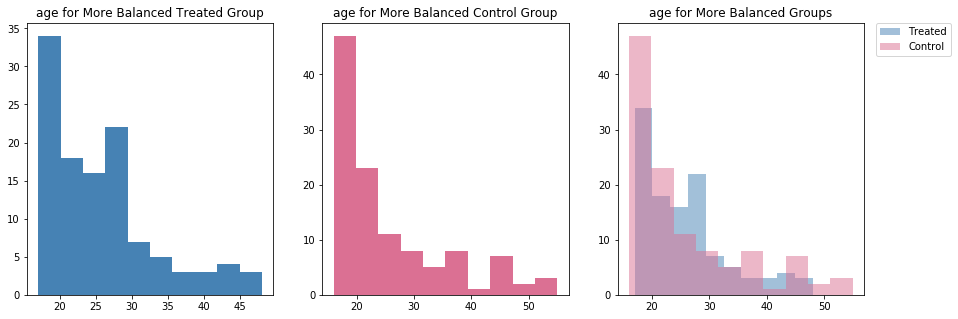

In [155]:
nice_hist_balanced_more('age')

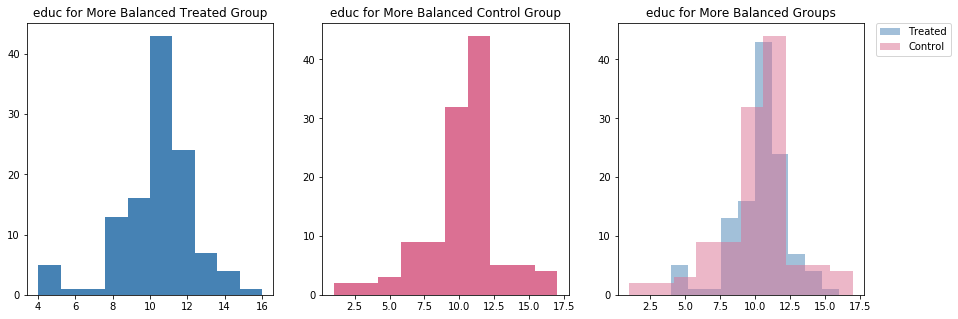

In [156]:
nice_hist_balanced_more('educ')

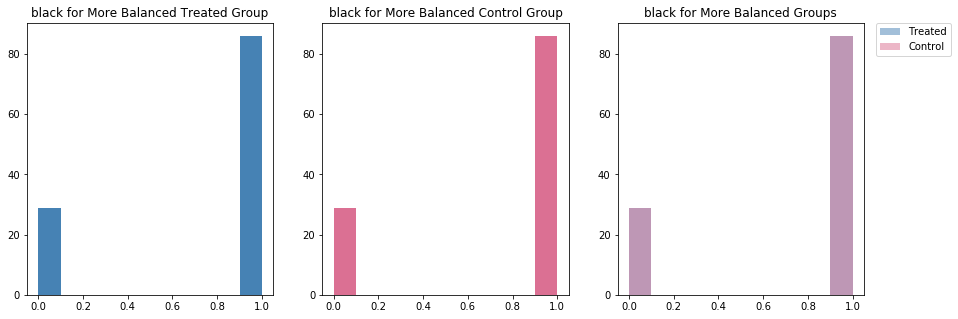

In [157]:
nice_hist_balanced_more('black')

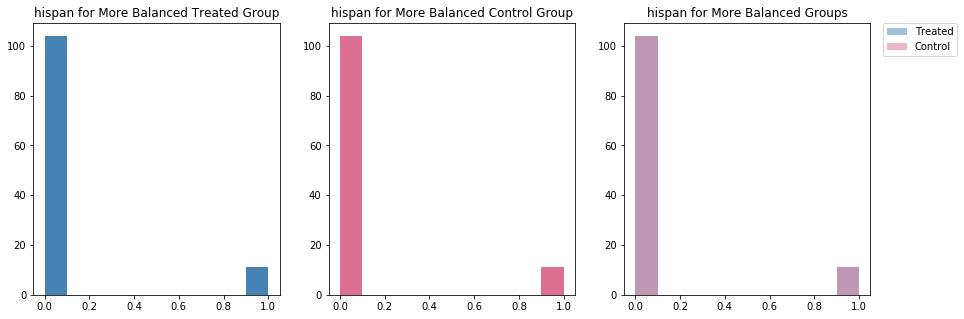

In [158]:
nice_hist_balanced_more('hispan')

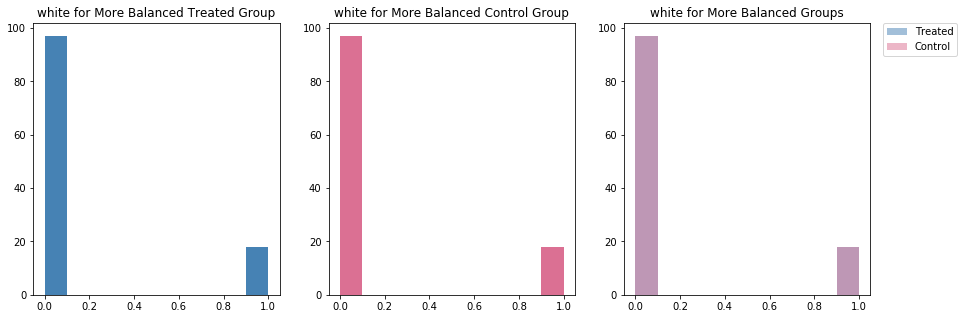

In [159]:
nice_hist_balanced_more('white')

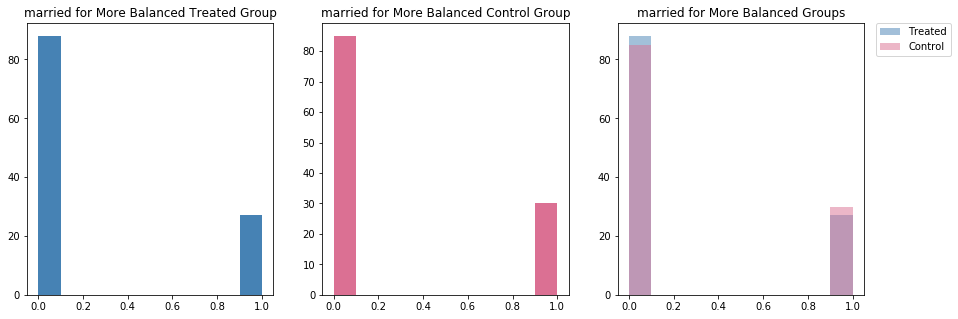

In [160]:
nice_hist_balanced_more('married')

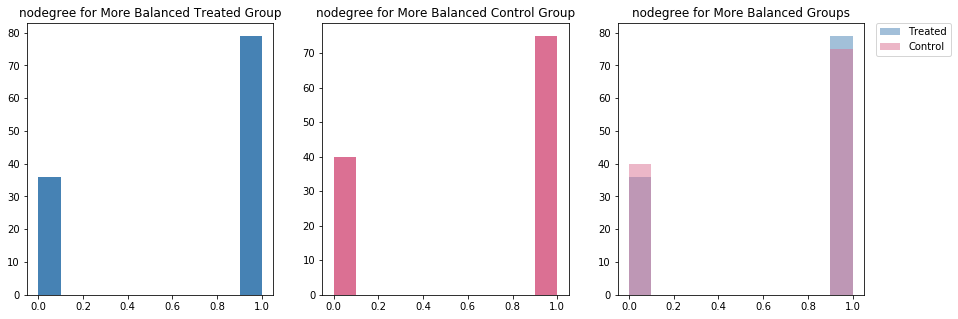

In [161]:
nice_hist_balanced_more('nodegree')

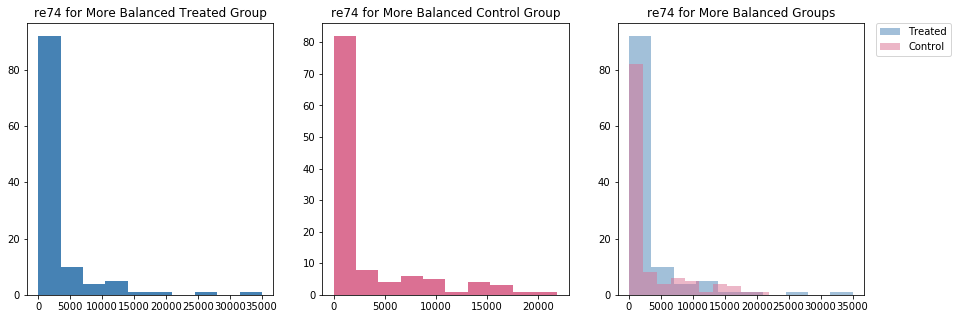

In [162]:
nice_hist_balanced_more('re74')

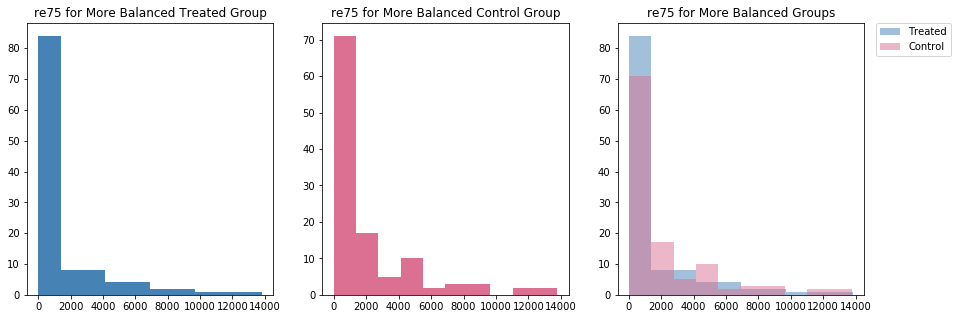

In [163]:
nice_hist_balanced_more('re75')

In [164]:
des_treated_1 = new_treated_la.describe()
des_treated_1

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
count,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1.0,25.817391,10.347826,0.747826,0.095652,0.234783,0.686957,2252.213359,1444.685057,7099.267750,0.156522
std,0.0,7.375377,2.140026,0.436161,0.295401,0.425718,0.465761,5456.172184,2738.173169,8639.854577,0.364939
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,20.000000,9.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,672.104550,0.000000
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5149.501000,0.000000
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,906.828200,1575.553500,10038.307000,0.000000
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,13830.640000,60307.930000,1.000000


In [165]:
des_control_1 = new_control_la.describe()
des_control_1

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
count,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.0,25.260870,10.208696,0.747826,0.095652,0.260870,0.652174,2850.920634,1898.535837,4990.552355,0.156522
std,0.0,10.192952,2.735394,0.436161,0.295401,0.441031,0.478365,4839.464349,2951.283930,5876.488649,0.364939
min,0.0,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,18.000000,9.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,20.000000,11.000000,1.000000,0.000000,0.000000,1.000000,489.816700,630.193500,2281.610000,0.000000
75%,0.0,30.000000,12.000000,1.000000,0.000000,1.000000,1.000000,2871.305500,2319.363000,7888.843500,0.000000
max,0.0,55.000000,17.000000,1.000000,1.000000,1.000000,1.000000,21918.320000,13776.530000,20243.380000,1.000000


In [166]:
normalized_diff_df_2 = pd.DataFrame(index = des_control.columns)
diff  = 100*(des_control_1.iloc[1].values-des_treated_1.iloc[1].values)/((des_control_1.iloc[1].values+des_treated_1.iloc[1].values)/2)
normalized_diff_df_2['Diff % After Balancing Twice'] = diff
normalized_diff_df_2

,Diff % After Balancing Twice
treat,-200.000000
age,-2.179094
educ,-1.353638
black,0.000000
hispan,0.000000
married,10.526316
nodegree,-5.194805
re74,23.464298
re75,27.150511
re78,-34.884148


We notice how all the features are now well-balanced, especially the *Race* feature whose difference diminished to zero due to the fact that we actually enforced it. Also, we notice that the count has decreased to 115. This was expected since we can't expect to have enough race-matching datapoints between the control and treated groups. 

After having balanced our groups substantially, we obtain two homogeneous **comparable** groups. These groups can now be used to truly assess the effect of the *treatment* (ie, the training program) on employees's salary.

-------------------------------------------

## 1.6 A less naive analysis

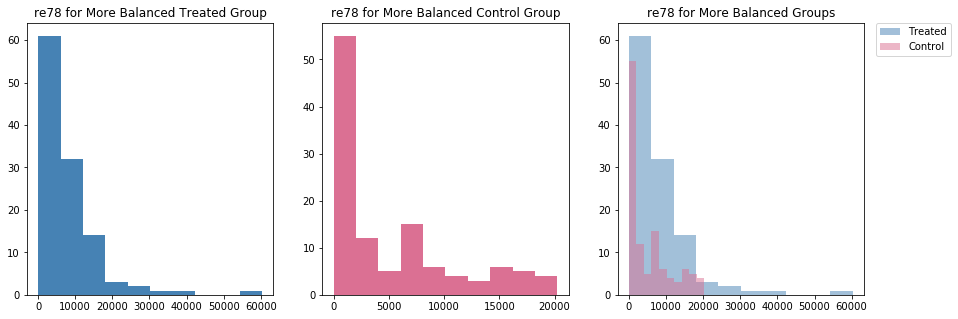

In [167]:
nice_hist_balanced_more('re78')

In [168]:
temp_sum = pd.DataFrame()
temp_sum['re78 for Better Balanced Control'] = new_control_la['re78'].describe()
temp_sum['re78 for Better Balanced Treated'] = new_treated_la['re78'].describe()
temp_sum

,re78 for Better Balanced Control,re78 for Better Balanced Treated
count,115.000000,115.000000
mean,4990.552355,7099.267750
std,5876.488649,8639.854577
min,0.000000,0.000000
25%,0.000000,672.104550
50%,2281.610000,5149.501000
75%,7888.843500,10038.307000
max,20243.380000,60307.930000


As the two groups are now homogeneous, we expect that their past salaries (re74 and re75) are similar, thus making their current salaries (re78) comparable to a certain extent. The control subjects have an average of 4990.55 \$  as salary whilst the treated subjects have average earnings of 7099 \$. Directly assessing that the treatment process by the difference in magnitude of these two features still has a slight naivete to it. Even though the two groups are well balanced now, what we should look at in order to truly assess the *treattment process* is how the salary evolves from re74 and re75 to re78 for both the control and treated groups. For simplicity, we will only look at re74. 

##### Control group:
- re74 --> re78: 2850 \$ --> 4990\$  ------> Improved by around 2000\$

#### Treated group:
- re74 --> re78: 2252 \$ --> 7099\$  ------> Improved by around 4700\$


Now, we can truly assess the training program as very useful for the employee. 

------------------------------------------------------

----------------------------------------------

## Question 2

### Part 1

I. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

In [176]:
import scipy as sc
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as cm
from itertools import product

#### Load the data

In [94]:
# Fetch the data and dispatch it in several variables
newsgroups_train = fetch_20newsgroups(subset='train')

cat_numbers = newsgroups_train.target
categories = newsgroups_train.target_names

#### Compute TFIDF features for every article

In [ ]:
# Instantiate the TFIDF vectorizer with stop_words removal and apply it on the data
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)

#### Split the dataset into a training, a testing and a validation

In [95]:
# Helper method that returns indices to split the original dataset
def get_train_validation_testing_rows(num_rows):
    permutations = np.random.permutation(num_rows)
    idx1 = int(num_rows * 0.8)
    idx2 = int(num_rows * 0.1)
    train_rows = permutations[:idx1]
    validation_rows = permutations[idx1: idx1 + idx2]
    testing_rows = permutations[idx1 + idx2:]
    return train_rows, validation_rows, testing_rows

# Actual indices for the three categories
train_rows, validation_rows, testing_rows = get_train_validation_testing_rows(cat_numbers.size)

# Split the original matrix into the three categories
train_matrix = vectors[train_rows]
validation_matrix = vectors[validation_rows]
testing_matrix = vectors[testing_rows]

# Split the original labels into the three categories
train_labels = cat_numbers[train_rows]
validation_labels = cat_numbers[validation_rows]
test_labels = cat_numbers[testing_rows]

### Part 2

Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.

#### Grid search

In [ ]:
# /!\ This cell takes a few hours to run /!\

# Grid search happens on another process so that the computation is non-blocking
from multiprocessing import Process, Manager

# Special dictionnary initialization that make it compatible with parallel reads
manager = Manager()
scores = manager.dict()

# Perform grid search. The range was chosen after performing some initial gird searches that suggested to aim for high\
# parameters
def grid_search():
    for n_estimators, max_depth in product(range(30, 80), range(50, 80)):
        classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        classifier.fit(train_matrix, train_labels)
        accuracy = classifier.score(validation_matrix, validation_labels)
        scores[(n_estimators, max_depth)] = accuracy
        print('Progression:', (n_estimators - 30) / 50)
        print(accuracy)
        
p = Process(target=grid_search)
p.start()

In [231]:
scores_d = dict(scores)
best_tuple = max(scores_d, key=scores_d.get)

print('Best tuple:', best_tuple, ' with score:', scores_d[best_tuple])

Best tuple: (70, 79)  with score: 0.863837312113


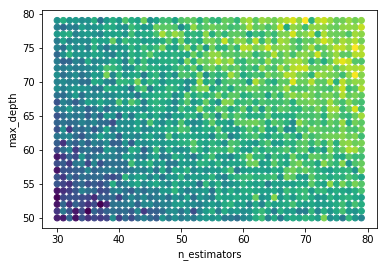

In [232]:
# Plot the grid search results

scores_l = list(scores_d.items())
x = np.array(list(map(lambda t: t[0][0], scores_l)))
y = np.array(list(map(lambda t: t[0][1], scores_l)))
c = np.array(list(map(lambda t: t[1], scores_l)))

plt.scatter(x,y,c=c)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

The plot above represents the accuracy (encoded in a color w/ blue for low, green for medium and yellow for high) of the model as a function of its parameters.

With no big surprise, the score improves as we increase the value for both parameters. The trend emphasize that we could get a better score by trying higher parameters. However, performing this grid search is already very long and the improvement we get in the end is not really significant.  

#### Train a random forest on the training set (with best parameters)

In [215]:
classifier = RandomForestClassifier(n_estimators=best_tuple[0], max_depth=best_tuple[1])
classifier.fit(train_matrix, train_labels)
predicted_labels = classifier.predict(testing_matrix)

#### Display a confusion matrix of the classification pipeline

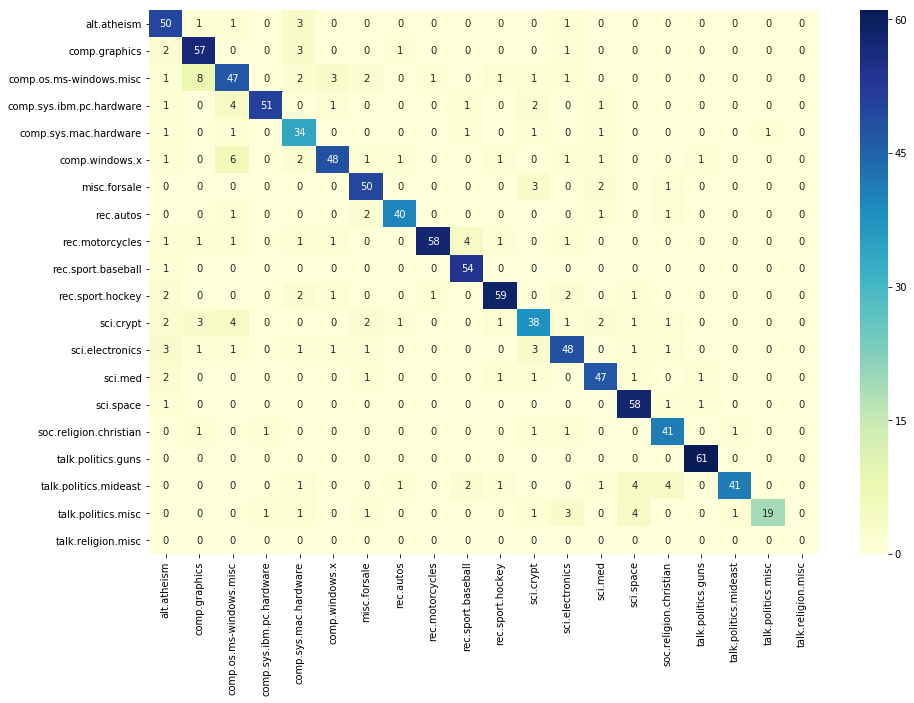

In [216]:
confusion_matrix = cm(test_labels, predicted_labels, labels=range(1, len(categories)+1))

df_cm = pd.DataFrame(confusion_matrix, categories,
                  categories)
plt.figure(figsize = (15,10))

sns.heatmap(df_cm,
            cmap="YlGnBu",
            annot=True,
            annot_kws={"size": 10}
            )
plt.show()

The confusion matrix confirms that our model is performing well. However, we can notice comp.os.ms-windows.misc is misqualified ofthen compared to other subject. It is nethertheless not that penalizing as the misqualifiaction concern topics that are really close (e.g. comp.windows.x).  

#### Inspect the features importance

In [217]:
# Get the word list sorted by index
vocabulary = {v: k for k, v in vectorizer.vocabulary_.items()}
words_indexed = np.array(list(map(lambda i: vocabulary[i], sorted(vocabulary))))

In [234]:
# Get the best features indices
feature_importances = classifier.feature_importances_
best_features_indices = np.argsort(feature_importances)

# Map best features indices to their corresponding words and output the top 30
words_indexed[best_features_indices[-30:]]

array(['writes', 'chip', 'christians', 'bible', 'orbit', 'nhl',
       'christian', 'key', 'moon', 'atheists', 'baseball', 'season',
       'government', 'graphics', 'athos', 'rutgers', 'mac', 'team', 'gun',
       'jesus', 'car', 'encryption', 'space', 'bike', 'god', 'clipper',
       'dod', 'windows', 'hockey', 'sale'],
      dtype='<U180')

The previous print shows the words have the strongest weights in our model. After inspecting this list, we get an intuition on how our model works. Indeed, we can see that it gives more weight to word that are directly linked to some of the categories. 